In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import random
from rpmml_project.pointmaze.point_maze import MinariTrajectoryDataset

In [2]:
dataset = MinariTrajectoryDataset(
    dataset_name="D4RL/pointmaze/umaze-v2",
    horizon=32
)

In [25]:
env = dataset.dataset.recover_environment()

def unwrap_env(env):
    while hasattr(env, "env"):
        env = env.env
    return env

env = unwrap_env(env)     # <-- now env.model and env.sim work

mj_model = env.model          # or env.sim.model
mj_data = env.data

In [26]:
from matplotlib.patches import Rectangle
import mujoco

-2.0 2.0
-1.0 2.0
0.0 2.0
1.0 2.0
2.0 2.0
-2.0 1.0
2.0 1.0
-2.0 0.0
-1.0 0.0
0.0 0.0
2.0 0.0
-2.0 -1.0
2.0 -1.0
-2.0 -2.0
-1.0 -2.0
0.0 -2.0
1.0 -2.0
2.0 -2.0


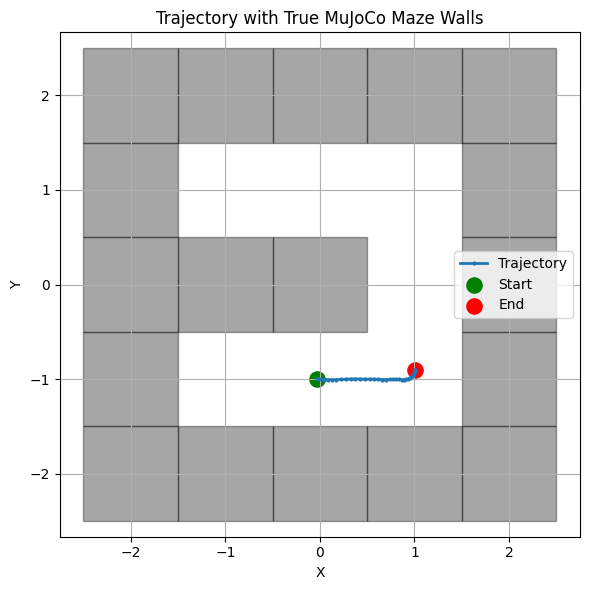

In [29]:
# -----------------------------
# Sample a trajectory window
# -----------------------------
idx = random.randint(0, len(dataset) - 1)
traj_norm = dataset[idx]
traj = dataset.denormalize(traj_norm).numpy()
xy = traj[:, :2]           # XY coordinates

# -----------------------------
# Plot the trajectory
# -----------------------------
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(xy[:, 0], xy[:, 1], marker='o', linewidth=2, markersize=2, label='Trajectory')
ax.scatter(xy[0, 0], xy[0, 1], c='green', s=120, label='Start')
ax.scatter(xy[-1, 0], xy[-1, 1], c='red', s=120, label='End')

# -----------------------------
# Render actual MuJoCo walls
# -----------------------------
for geom_id in range(mj_model.ngeom):

    # Get geom name
    name = mujoco.mj_id2name(mj_model, mujoco.mjtObj.mjOBJ_GEOM, geom_id)

    if name is None or not "block" in name:
        continue

    pos = mj_model.geom_pos[geom_id]     # center (x, y, z)
    size = mj_model.geom_size[geom_id]   # half-extents (hx, hy, hz)

    cx, cy = pos[:2]
    hx, hy = size[:2]
    print(cx, cy)

    rect = Rectangle(
        (cx - hx, cy - hy),
        2 * hx,
        2 * hy,
        color="black",
        alpha=0.35,
        zorder=0
    )
    ax.add_patch(rect)


# -----------------------------
# Final figure styling
# -----------------------------
ax.set_title("Trajectory with True MuJoCo Maze Walls")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.axis("equal")
ax.grid(True)
ax.legend()
plt.tight_layout()

plt.show()